In [1]:
library(RCurl)
library(jsonlite)
library(caret)
library(ggplot2)
library(e1071)
library(h2o)
library(statmod)
library(MASS)
library(corrplot)
library(data.table)
library(reshape2)
library(ROSE)

Loading required package: bitops
Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'e1071' was built under R version 3.4.3"Warning message:
"package 'h2o' was built under R version 3.4.4"
----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: 'h2o'

The following objects are masked from 'package:stats':

    cor, sd, var

The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor

In [2]:
data.scaled <- read.table("ess-scaled.csv", header=TRUE, sep=",") 

In [4]:
data.scaled <- data.scaled[,-1]

In [41]:
smp_size <- floor(0.9 * nrow(data.scaled))
set.seed(1234)
train_ind <- sample(seq_len(nrow(data.scaled)), size = smp_size)
train <- data.scaled[train_ind, ]
test <- data.scaled[-train_ind, ]

In [5]:
train.bal <- ovun.sample(volact ~ ., data = train, method = "over", N = 114264)$data

In [19]:
train.X <- train[, -1]
train.y <- train[, 1]
train.y <- factor(train.y, levels = 0:1)
train.X.bal <- train[, -1]
train.y.bal <- train[, 1]
train.y.bal <- factor(train.y, levels = 0:1)
test.X <- test[, -1]
test.y <- test[, 1]
test.y <- factor(test.y, levels = 0:1)

In [7]:
ACC <- function(table){
    tp <- table[2,2]
    tn <- table[1,1]
    fp <- table[2,1]
    fn <- table[1,2]
    acc <- (tn + tp) / (tn + tp + fn + fp)
    return(acc)
}

In [8]:
PRE <- function(table){
    tp <- table[2,2]
    tn <- table[1,1]
    fp <- table[2,1]
    fn <- table[1,2]
    PCP <- (tp + tn)/(tp + tn + fp + fn)
    PMC <- max(tp + fn, tn + fp)/(tp + tn + fp + fn)
    result <- (PCP - PMC)/(1 - PMC)
    return(result)
}

In [9]:
F1 <- function(table){
    tp <- table[2,2]
    tn <- table[1,1]
    fp <- table[2,1]
    fn <- table[1,2]
    precision <- tp / (tp + fp)
    recall <- tp / (tp + fn)
    result <- (2 * precision * recall) / (precision + recall)
    return(result)
}

# aus: R deep learning essentials

In [9]:
#aus: R deep learning essentials
m20.0 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.1 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.1),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.2 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.2),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.3 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.3),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.4 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.4),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.5 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.5),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.6 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.6),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.7 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.7),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.8 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.8),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.9 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0.9),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)
m20.10 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 1),
           trControl= trainControl(method = "none"),
           MaxNWts = 1000,
           maxit = 100)

In [11]:
yhat20.0 <- predict(m20.0)
yhat20.1 <- predict(m20.1)
yhat20.2 <- predict(m20.2)
yhat20.3 <- predict(m20.3)
yhat20.4 <- predict(m20.4)
yhat20.5 <- predict(m20.5)
yhat20.6 <- predict(m20.6)
yhat20.7 <- predict(m20.7)
yhat20.8 <- predict(m20.8)
yhat20.9 <- predict(m20.9)
yhat20.10 <- predict(m20.10)
yhat_unseen20.0 <- predict(m20.0, as.matrix(test.X))
yhat_unseen20.1 <- predict(m20.1, as.matrix(test.X))
yhat_unseen20.2 <- predict(m20.2, as.matrix(test.X))
yhat_unseen20.3 <- predict(m20.3, as.matrix(test.X))
yhat_unseen20.4 <- predict(m20.4, as.matrix(test.X))
yhat_unseen20.5 <- predict(m20.5, as.matrix(test.X))
yhat_unseen20.6 <- predict(m20.6, as.matrix(test.X))
yhat_unseen20.7 <- predict(m20.7, as.matrix(test.X))
yhat_unseen20.8 <- predict(m20.8, as.matrix(test.X))
yhat_unseen20.9 <- predict(m20.9, as.matrix(test.X))
yhat_unseen20.10 <- predict(m20.10, as.matrix(test.X))

In [13]:
measures <- c("AccuracyNull", "Accuracy", "AccuracyLower", "AccuracyUpper")

n20.0.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.0))
n20.1.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.1))
n20.2.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.2))
n20.3.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.3))
n20.4.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.4))
n20.5.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.5))
n20.6.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.6))
n20.7.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.7))
n20.8.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.8))
n20.9.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.9))
n20.10.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20.10))
n20.0.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.0))
n20.1.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.1))
n20.2.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.2))
n20.3.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.3))
n20.4.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.4))
n20.5.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.5))
n20.6.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.6))
n20.7.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.7))
n20.8.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.8))
n20.9.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.9))
n20.10.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20.10))

In [18]:
shrinkage <- rbind(
  cbind(Size = 20.0, Sample = "In", as.data.frame(t(n20.0.insample$overall[measures]))),
  cbind(Size = 20.0, Sample = "Out", as.data.frame(t(n20.0.outsample$overall[measures]))),
  cbind(Size = 20.1, Sample = "In", as.data.frame(t(n20.1.insample$overall[measures]))),
  cbind(Size = 20.1, Sample = "Out", as.data.frame(t(n20.1.outsample$overall[measures]))),
  cbind(Size = 20.2, Sample = "In", as.data.frame(t(n20.2.insample$overall[measures]))),
  cbind(Size = 20.2, Sample = "Out", as.data.frame(t(n20.2.outsample$overall[measures]))),
  cbind(Size = 20.3, Sample = "In", as.data.frame(t(n20.3.insample$overall[measures]))),
  cbind(Size = 20.3, Sample = "Out", as.data.frame(t(n20.3.outsample$overall[measures]))),
  cbind(Size = 20.4, Sample = "In", as.data.frame(t(n20.4.insample$overall[measures]))),
  cbind(Size = 20.4, Sample = "Out", as.data.frame(t(n20.4.outsample$overall[measures]))),
  cbind(Size = 20.5, Sample = "In", as.data.frame(t(n20.5.insample$overall[measures]))),
  cbind(Size = 20.5, Sample = "Out", as.data.frame(t(n20.5.outsample$overall[measures]))),
  cbind(Size = 20.6, Sample = "In", as.data.frame(t(n20.6.insample$overall[measures]))),
  cbind(Size = 20.6, Sample = "Out", as.data.frame(t(n20.6.outsample$overall[measures]))),
  cbind(Size = 20.7, Sample = "In", as.data.frame(t(n20.7.insample$overall[measures]))),
  cbind(Size = 20.7, Sample = "Out", as.data.frame(t(n20.7.outsample$overall[measures]))),
  cbind(Size = 20.8, Sample = "In", as.data.frame(t(n20.8.insample$overall[measures]))),
  cbind(Size = 20.8, Sample = "Out", as.data.frame(t(n20.8.outsample$overall[measures]))),
  cbind(Size = 20.9, Sample = "In", as.data.frame(t(n20.9.insample$overall[measures]))),
  cbind(Size = 20.9, Sample = "Out", as.data.frame(t(n20.9.outsample$overall[measures]))),
  cbind(Size = 20.99, Sample = "In", as.data.frame(t(n20.10.insample$overall[measures]))),
  cbind(Size = 20.99, Sample = "Out", as.data.frame(t(n20.10.outsample$overall[measures])))
  )
shrinkage$Pkg <- rep(c("In", "Out"), 1)

dodge <- position_dodge(width=0.4)

p.shrinkage <- ggplot(shrinkage, aes(interaction(Size, sep = " : "), Accuracy,
                      ymin = AccuracyLower, ymax = AccuracyUpper,
                      shape = Sample, linetype = Sample)) +
  geom_point(size = 2.5, position = dodge) +
  geom_errorbar(width = .25, position = dodge) +
  xlab("") + ylab("Accuracy + 95% CI") +
  theme_classic() +
  theme(legend.key.size = unit(1, "cm"), legend.position = c(.8, .2))

png("test_20.png",
    width = 6, height = 6, units = "in", res = 600)
  print(p.shrinkage)
dev.off()

png 
  2

In [19]:
m5 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(5),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m10 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(10),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m15 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(15),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m20 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(20),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m30 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(30),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m40 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(40),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m50 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(50),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m70 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(70),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 2000,
           maxit = 100)
m100 <- train(x = train.X, y = train.y,
           method = "nnet", 
           tuneGrid = expand.grid(
           .size = c(100),
           .decay = 0),
           trControl= trainControl(method = "none"),
           MaxNWts = 20000,
           maxit = 100)

# weights:  126
initial  value 75415.583178 
iter  10 value 52153.877568
iter  20 value 51754.055353
iter  30 value 51619.704179
iter  40 value 51532.526562
iter  50 value 51491.899731
iter  60 value 51438.785687
iter  70 value 51410.580844
iter  80 value 51376.638678
iter  90 value 51338.828328
iter 100 value 51314.771455
final  value 51314.771455 
stopped after 100 iterations
# weights:  251
initial  value 57155.518870 
iter  10 value 52061.184901
iter  20 value 51594.146760
iter  30 value 51428.837685
iter  40 value 51356.780532
iter  50 value 51249.435599
iter  60 value 51192.042495
iter  70 value 51133.309915
iter  80 value 51054.262882
iter  90 value 51018.341720
iter 100 value 50975.927799
final  value 50975.927799 
stopped after 100 iterations
# weights:  376
initial  value 68330.909556 
iter  10 value 51924.190901
iter  20 value 51593.909393
iter  30 value 51293.164832
iter  40 value 51103.736696
iter  50 value 51038.082360
iter  60 value 50973.967209
iter  70 value 50917.5949

In [20]:
yhat5 <- predict(m5)
yhat10 <- predict(m10)
yhat15 <- predict(m15)
yhat20 <- predict(m20)
yhat30 <- predict(m30)
yhat40 <- predict(m40)
yhat50 <- predict(m50)
yhat70 <- predict(m70)
yhat100 <- predict(m100)

yhat_unseen5 <- predict(m5, as.matrix(test.X))
yhat_unseen10 <- predict(m10, as.matrix(test.X))
yhat_unseen15 <- predict(m15, as.matrix(test.X))
yhat_unseen20 <- predict(m20, as.matrix(test.X))
yhat_unseen30 <- predict(m30, as.matrix(test.X))
yhat_unseen40 <- predict(m40, as.matrix(test.X))
yhat_unseen50 <- predict(m50, as.matrix(test.X))
yhat_unseen70 <- predict(m70, as.matrix(test.X))
yhat_unseen100 <- predict(m100, as.matrix(test.X))

In [21]:
measures <- c("AccuracyNull", "Accuracy", "AccuracyLower", "AccuracyUpper")

n5.insample <- caret::confusionMatrix(xtabs(~train.y + yhat5))
n10.insample <- caret::confusionMatrix(xtabs(~train.y + yhat10))
n15.insample <- caret::confusionMatrix(xtabs(~train.y + yhat15))
n20.insample <- caret::confusionMatrix(xtabs(~train.y + yhat20))
n30.insample <- caret::confusionMatrix(xtabs(~train.y + yhat30))
n40.insample <- caret::confusionMatrix(xtabs(~train.y + yhat40))
n50.insample <- caret::confusionMatrix(xtabs(~train.y + yhat50))
n70.insample <- caret::confusionMatrix(xtabs(~train.y + yhat70))
n100.insample <- caret::confusionMatrix(xtabs(~train.y + yhat100))

n5.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen5))
n10.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen10))
n15.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen15))
n20.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen20))
n30.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen30))
n40.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen40))
n50.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen50))
n70.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen70))
n100.outsample <- caret::confusionMatrix(xtabs(~test.y + yhat_unseen100))

In [23]:
shrinkage <- rbind(
  cbind(Size = 5, Sample = "In", as.data.frame(t(n5.insample$overall[measures]))),
  cbind(Size = 5, Sample = "Out", as.data.frame(t(n5.outsample$overall[measures]))),
  cbind(Size = 10, Sample = "In", as.data.frame(t(n10.insample$overall[measures]))),
  cbind(Size = 10, Sample = "Out", as.data.frame(t(n10.outsample$overall[measures]))),
  cbind(Size = 15, Sample = "In", as.data.frame(t(n15.insample$overall[measures]))),
  cbind(Size = 15, Sample = "Out", as.data.frame(t(n15.outsample$overall[measures]))),
  cbind(Size = 20, Sample = "In", as.data.frame(t(n20.insample$overall[measures]))),
  cbind(Size = 20, Sample = "Out", as.data.frame(t(n20.outsample$overall[measures]))),
  cbind(Size = 30, Sample = "In", as.data.frame(t(n30.insample$overall[measures]))),
  cbind(Size = 30, Sample = "Out", as.data.frame(t(n30.outsample$overall[measures]))),
  cbind(Size = 40, Sample = "In", as.data.frame(t(n40.insample$overall[measures]))),
  cbind(Size = 40, Sample = "Out", as.data.frame(t(n40.outsample$overall[measures]))),
  cbind(Size = 50, Sample = "In", as.data.frame(t(n50.insample$overall[measures]))),
  cbind(Size = 50, Sample = "Out", as.data.frame(t(n50.outsample$overall[measures]))),
  cbind(Size = 70, Sample = "In", as.data.frame(t(n70.insample$overall[measures]))),
  cbind(Size = 70, Sample = "Out", as.data.frame(t(n70.outsample$overall[measures]))),
  cbind(Size = 100, Sample = "In", as.data.frame(t(n100.insample$overall[measures]))),
  cbind(Size = 100, Sample = "Out", as.data.frame(t(n100.outsample$overall[measures])))
  )
shrinkage$Pkg <- rep(c("In", "Out"), 1)

dodge <- position_dodge(width=0.4)

p.shrinkage <- ggplot(shrinkage, aes(interaction(Size, sep = " : "), Accuracy,
                      ymin = AccuracyLower, ymax = AccuracyUpper,
                      shape = Sample, linetype = Sample)) +
  geom_point(size = 2.5, position = dodge) +
  geom_errorbar(width = .25, position = dodge) +
  xlab("") + ylab("Accuracy + 95% CI") +
  theme_classic() +
  theme(legend.key.size = unit(1, "cm"), legend.position = c(.8, .2))

png("test_5150.png",
    width = 6, height = 6, units = "in", res = 600)
  print(p.shrinkage)
dev.off()

png 
  2

# aus h2o deep learning

In [10]:
c1 <- h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\laris\AppData\Local\Temp\RtmpkXY0ly/h2o_laris_started_from_r.out
    C:\Users\laris\AppData\Local\Temp\RtmpkXY0ly/h2o_laris_started_from_r.err


Starting H2O JVM and connecting: ... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         9 seconds 137 milliseconds 
    H2O cluster timezone:       Europe/Berlin 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.18.0.8 
    H2O cluster version age:    1 month and 11 days  
    H2O cluster name:           H2O_started_from_R_laris_exq087 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.66 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FAL

In [11]:
train$volact <- as.factor(train$volact)
test$volact <- as.factor(test$volact)

h2o.train <- as.h2o(train)
h2o.test <- as.h2o(test)

  |======================================================================| 100%
  |======================================================================| 100%


In [ ]:
train.bal$volact <- as.factor(train.bal$volact)
h2o.train.bal <- as.h2o(train.bal)

In [51]:
xnames <- colnames(train[,-1])

In [13]:
#xnames

In [31]:
m2a <- h2o.deeplearning(
  x = xnames,
  #y = "Outcome",
  training_frame= h2o.train,
  validation_frame = h2o.test,
  activation = "Tanh",
  autoencoder = TRUE,
  hidden = c(20),
  epochs = 10,
  sparsity_beta = 0,
  l1 = 0,
  l2 = 0
)

m2b <- h2o.deeplearning(
  x = xnames,
  #y = "Outcome",
  training_frame= h2o.train,
  validation_frame = h2o.test,
  activation = "Tanh",
  autoencoder = TRUE,
  hidden = c(20, 15),
  epochs = 10,
  sparsity_beta = 0,
  #hidden_pout_ratios = c(.3),
  l1 = 0,
  l2 = 0
)

m2c <- h2o.deeplearning(
  x = xnames,
  #y = "Outcome",
  training_frame= h2o.train,
  validation_frame = h2o.test,
  activation = "Tanh",
  autoencoder = TRUE,
  hidden = c(20, 15, 10),
  epochs = 10,
  sparsity_beta = 0,
  l1 = 0,
  l2 = 0
)

m2d <- h2o.deeplearning(
  x = xnames,
  #y = "Outcome",
  training_frame= h2o.train,
  validation_frame = h2o.test,
  activation = "Tanh",
  autoencoder = TRUE,
  hidden = c(20, 15, 10, 5),
  epochs = 10,
  sparsity_beta = 0,
  #hi2den_dropout_ratios = c(.3),
  l1 = 0,
  l2 = 0
)

summary(m2a)
summary(m2b)
summary(m2c)
summary(m2d)

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
Model Details:

H2OAutoEncoderModel: deeplearning
Model Key:  DeepLearning_model_R_1527321233701_68 
Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 922 weights/biases, 17,3 KB, 873.280 training samples, mini-batch size 1
  layer units  type dropout       l1       l2 mean_rate rate_rms momentum
1     1    22 Input  0.00 %                                              
2     2    20  Tanh  0.00 % 0.000000 0.000000  0.037412 0.023002 0.000000
3     3    22  Tanh         0.000000 0.000000  0.073935 0.038064 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2   -0.006882   0.138086 -0.010339 0.031392


png 
  2

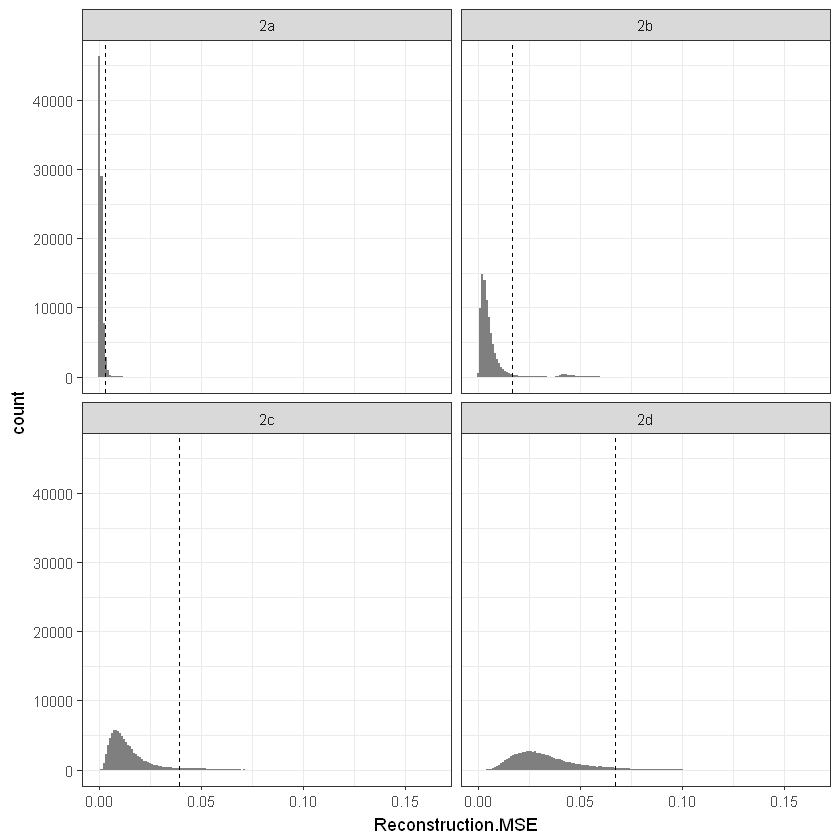

In [32]:
error1 <- as.data.frame(h2o.anomaly(m2a, h2o.train))
error2a <- as.data.frame(h2o.anomaly(m2b, h2o.train))
error2b <- as.data.frame(h2o.anomaly(m2c, h2o.train))
error2c <- as.data.frame(h2o.anomaly(m2d, h2o.train))

error <- as.data.table(rbind(
  cbind.data.frame(Model = "2a", error1),
  cbind.data.frame(Model = "2b", error2a),
  cbind.data.frame(Model = "2c", error2b),
  cbind.data.frame(Model = "2d", error2c)))

percentile <- error[, .(
  Percentile = quantile(Reconstruction.MSE, probs = .95)
), by = Model]

p1 <- ggplot(error, aes(Reconstruction.MSE)) +
  geom_histogram(binwidth = .001, fill = "grey50") +
  geom_vline(aes(xintercept = Percentile), data = percentile, linetype = 2) +
  theme_bw() +
  facet_wrap(~Model)
print(p1)

png("error_1.png",
    width = 5.5, height = 5.5, units = "in", res = 600)
print(p1)
dev.off()

In [14]:
#in sample = 0.70
mt3 <- h2o.deeplearning(
  x = xnames,
  y = "volact",
  training_frame = h2o.train,
  validation_frame = h2o.test,
  activation = "Rectifier",
  hidden = c(200, 200, 100),
  epochs = 10,
  rate = .005,
  loss = "CrossEntropy",
  #input_dropout_ratio = .2,
  #hidden_dropout_ratios = c(.5, .3, .1),
  export_weights_and_biases = TRUE
)
summary(mt3)

  |======================================================================| 100%
Model Details:

H2OBinomialModel: deeplearning
Model Key:  DeepLearning_model_R_1527776472963_1 
Status of Neuron Layers: predicting volact, 2-class classification, bernoulli distribution, CrossEntropy loss, 65.102 weights/biases, 776,2 KB, 890.175 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    22     Input  0.00 %                                              
2     2   200 Rectifier  0.00 % 0.000000 0.000000  0.039764 0.015742 0.000000
3     3   200 Rectifier  0.00 % 0.000000 0.000000  0.016766 0.008441 0.000000
4     4   100 Rectifier  0.00 % 0.000000 0.000000  0.038317 0.059579 0.000000
5     5     2   Softmax         0.000000 0.000000  0.009294 0.003672 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2    0.014879   0.189256  0.239910 0.105072
3   -0.027969   0.072399  0.916157 

In [32]:
mt3_pred <- h2o.predict(mt3, h2o.test)
ACC(table(as.vector(mt3_pred$predict), as.vector(h2o.test$volact)))
PRE(table(as.vector(mt3_pred$predict), as.vector(h2o.test$volact)))
F1(table(as.vector(mt3_pred$predict), as.vector(h2o.test$volact)))

  |======================================================================| 100%


[1] 0.5887263

[1] -0.1458513

[1] 0.5815246

In [35]:
h2o.varimp(mt3)

variable,relative_importance,scaled_importance,percentage
eduyrs,1.0000000,1.0000000,0.06786655
yrbrn,0.9774464,0.9774464,0.06633592
round1,0.9719231,0.9719231,0.06596107
sclmeet,0.8775737,0.8775737,0.05955790
social_trust,0.8170829,0.8170829,0.05545260
church,0.7512495,0.7512495,0.05098471
tvpol,0.7493991,0.7493991,0.05085914
trust_exe,0.7223423,0.7223423,0.04902288
political_interest,0.7104195,0.7104195,0.04821373
married,0.6410848,0.6410848,0.04350822


In [33]:
#balanced training set
mtbal <- h2o.deeplearning(
  x = xnames,
  y = "volact",
  training_frame = h2o.train.bal,
  validation_frame = h2o.test,
  activation = "Rectifier",
  hidden = c(200, 200, 100),
  epochs = 10,
  rate = .005,
  loss = "CrossEntropy",
  #input_dropout_ratio = .2,
  #hidden_dropout_ratios = c(.5, .3, .1),
  export_weights_and_biases = TRUE
)
summary(mtbal)

  |======================================================================| 100%
Model Details:

H2OBinomialModel: deeplearning
Model Key:  DeepLearning_model_R_1527753908592_365 
Status of Neuron Layers: predicting volact, 2-class classification, bernoulli distribution, CrossEntropy loss, 65.102 weights/biases, 776,2 KB, 1.157.574 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1    22     Input  0.00 %                                              
2     2   200 Rectifier  0.00 % 0.000000 0.000000  0.004992 0.001929 0.000000
3     3   200 Rectifier  0.00 % 0.000000 0.000000  0.005542 0.004359 0.000000
4     4   100 Rectifier  0.00 % 0.000000 0.000000  0.037032 0.046162 0.000000
5     5     2   Softmax         0.000000 0.000000  0.005273 0.002752 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2    0.040592   0.249749  0.011312 0.145901
3   -0.043690   0.103730  0.805

In [34]:
mtbal_pred <- h2o.predict(mtbal, h2o.test)
ACC(table(as.vector(mtbal_pred$predict), as.vector(h2o.test$volact)))
PRE(table(as.vector(mtbal_pred$predict), as.vector(h2o.test$volact)))
F1(table(as.vector(mtbal_pred$predict), as.vector(h2o.test$volact)))

  |======================================================================| 100%


[1] 0.5433842

[1] -0.2721792

[1] 0.5667351

In [60]:
h2o.varimp(mtbal)

variable,relative_importance,scaled_importance,percentage
eduyrs,1.0000000,1.0000000,0.07137106
round1,0.9554664,0.9554664,0.06819266
yrbrn,0.7707927,0.7707927,0.05501230
church,0.7557535,0.7557535,0.05393893
social_trust,0.7368259,0.7368259,0.05258805
tvpol,0.7180524,0.7180524,0.05124816
political_interest,0.7118363,0.7118363,0.05080452
sclmeet,0.7048413,0.7048413,0.05030527
trust_exe,0.7023646,0.7023646,0.05012851
stfdem,0.6119521,0.6119521,0.04367567


## plotting and stuff

png 
  2

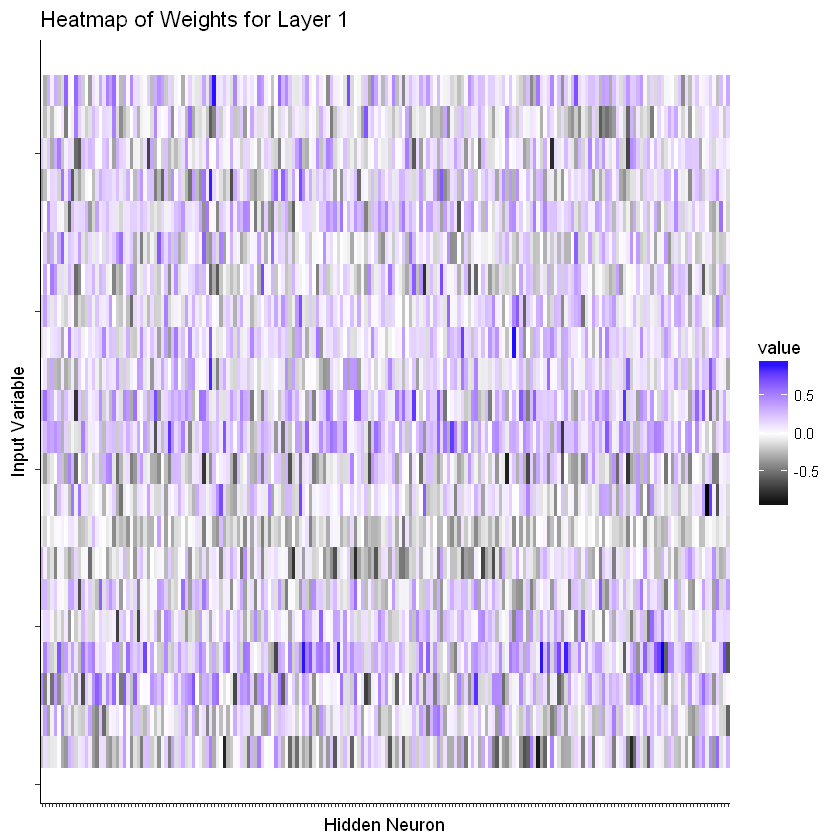

In [38]:
## weights for mapping from inputs to hidden layer 1 neurons
w1 <- as.matrix(h2o.weights(mtbal, 1))

## plot heatmap of the weights
tmp <- as.data.frame(t(w1))
tmp$Row <- 1:nrow(tmp)
tmp <- melt(tmp, id.vars = c("Row"))

p.heat <- ggplot(tmp,
       aes(variable, Row, fill = value)) +
  geom_tile() +
  scale_fill_gradientn(colours = c("black", "white", "blue")) +
  theme_classic() +
  theme(axis.text = element_blank()) +
  xlab("Hidden Neuron") +
  ylab("Input Variable") +
  ggtitle("Heatmap of Weights for Layer 1")
print(p.heat)

png("heatmap_layer1.png",
    width = 5.5, height = 7.5, units = "in", res = 600)
print(p.heat)
dev.off()

## RANDOM FOREST

In [82]:
rf2 <- h2o.randomForest(        
  training_frame = h2o.train,        
  validation_frame = h2o.test,      
  x = xnames,                        
  y = "volact",                          
  model_id = "forest2",    
  ntrees = 400,            
  max_depth = 30,
  stopping_rounds = 0,           
  score_each_iteration = F,     
  seed = 1000000) 
summary(rf2)

  |======================================================================| 100%
Model Details:

H2OBinomialModel: drf
Model Key:  forest2 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1             400                      400            88854137        30
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        30   30.00000      17362      17955 17694.77000

H2OBinomialMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  0.2018624
RMSE:  0.449291
LogLoss:  0.5890251
Mean Per-Class Error:  0.3630926
AUC:  0.6968135
Gini:  0.3936271

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
           0     1    Error          Rate
0      29048 28137 0.492035  =28137/57185
1       7058 23085 0.234151   =7058/30143
Totals 36106 51222 0.403021  =35195/87328

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshol

In [55]:
rf2_pred <- h2o.predict(rf2, h2o.test)
ACC(table(as.vector(rf2_pred$predict), as.vector(h2o.test$volact)))
PRE(table(as.vector(rf2_pred$predict), as.vector(h2o.test$volact)))
F1(table(as.vector(rf2_pred$predict), as.vector(h2o.test$volact)))

  |======================================================================| 100%


[1] 0.5783182

[1] -0.1748493

[1] 0.5851582

In [13]:
rfbal <- h2o.randomForest(        
  training_frame = h2o.train.bal,        
  validation_frame = h2o.test,      
  x = xnames,                        
  y = "volact",                          
  model_id = "forestbal",    
  ntrees = 400,            
  max_depth = 30,
  stopping_rounds = 0,           
  score_each_iteration = F,     
  seed = 1000000) 
summary(rfbal)

  |======================================================================| 100%
Model Details:

H2OBinomialModel: drf
Model Key:  forestbal 
Model Summary: 
  number_of_trees number_of_internal_trees model_size_in_bytes min_depth
1             400                      400            97219005        30
  max_depth mean_depth min_leaves max_leaves mean_leaves
1        30   30.00000      18989      19677 19364.53500

H2OBinomialMetrics: drf
** Reported on training data. **
** Metrics reported on Out-Of-Bag training samples **

MSE:  0.09830158
RMSE:  0.3135308
LogLoss:  0.3311802
Mean Per-Class Error:  0.08044977
AUC:  0.9533665
Gini:  0.9067329

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
           0     1    Error          Rate
0      56098  1087 0.019008   =1087/57185
1       8099 48980 0.141891   =8099/57079
Totals 64197 50067 0.080393  =9186/114264

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric thr

In [14]:
rfbal_pred <- h2o.predict(rfbal, h2o.test)
ACC(table(as.vector(rfbal_pred$predict), as.vector(h2o.test$volact)))
PRE(table(as.vector(rfbal_pred$predict), as.vector(h2o.test$volact)))
F1(table(as.vector(rfbal_pred$predict), as.vector(h2o.test$volact)))

  |======================================================================| 100%


[1] 0.5812036

[1] -0.1668102

[1] 0.5853061

In [112]:
rf2_pred <- h2o.predict(rf2, h2o.test)
table("pred"=as.vector(rf2_pred$predict), "rue"=as.vector(h2o.test$volact))

  |======================================================================| 100%


    rue
pred    0    1
   0 2685  582
   1 3536 2901

## corrplot

In [1]:
png("corrplot.png", width = 5.5, height = 5.5, units = "in", res = 600)
c <- corrplot(res, type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)
dev.off()
#print(c)

ERROR: Error in corrplot(res, type = "upper", order = "hclust", tl.col = "black", : konnte Funktion "corrplot" nicht finden


## marginal effects

In [65]:
range <- seq(-4, 2, length.out = 20)
sel <- 7
plot.data <- matrix(NA, nrow = length(range), ncol = ncol(test[,-1]))
for(i in 2:ncol(test)){
    plot.data[,i-1] <- mean(test[,i])
}
for(i in 1:length(range)){
    plot.data[i, sel] <- range[i]
}
colnames(plot.data) <- xnames

In [66]:
h2o.plot <- as.h2o(plot.data)

  |======================================================================| 100%


In [67]:
mt3_pred <- h2o.predict(mt3, h2o.plot)

  |======================================================================| 100%


In [88]:
df_nn <- data.frame(cbind(range, as.vector(mt3_pred$p1)))

png 
  2

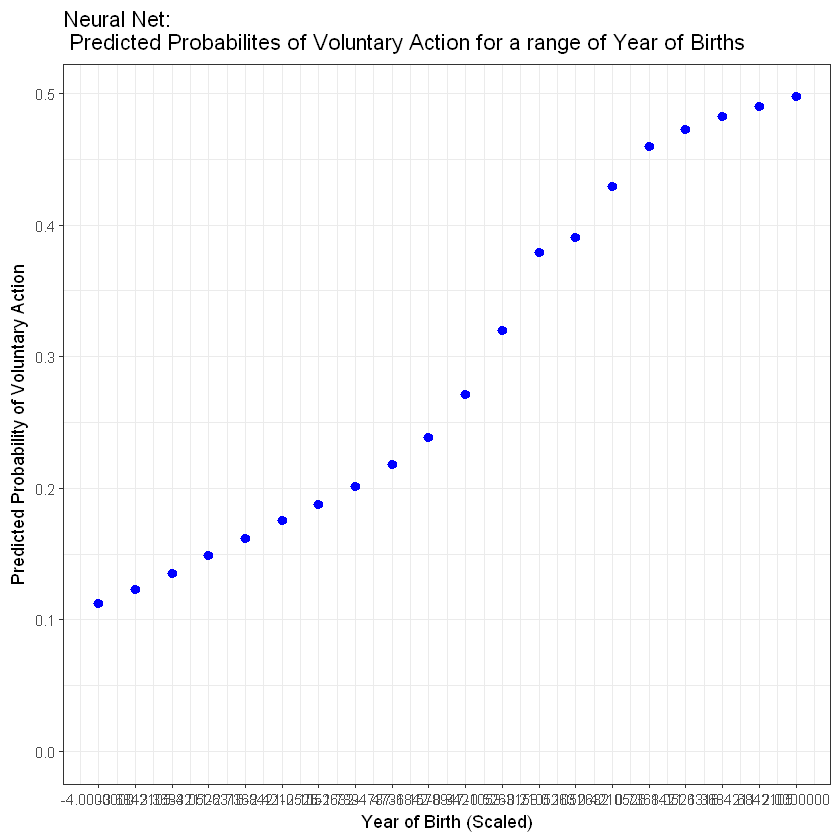

In [101]:
png("nn-age-volact.png")
myplot <- ggplot(df_nn,aes(x = df_nn[,1], y = df_nn[,2], ymin = 0, ymax = 0)) + 
    geom_pointrange(col = "blue") + 
    ylab("Predicted Probability of Voluntary Action") + 
    xlab("Year of Birth (Scaled)") + 
    ggtitle("Neural Net: \n Predicted Probabilites of Voluntary Action for a range of Year of Births") + 
    scale_x_continuous(breaks = range) + 
    theme_bw() 
print(myplot)
dev.off()
print(myplot)

In [83]:
rf2_pred <- h2o.predict(rf2, h2o.plot)

  |======================================================================| 100%


In [90]:
df_rf <- data.frame(cbind(range, as.vector(rf2_pred$p1)))

png 
  2

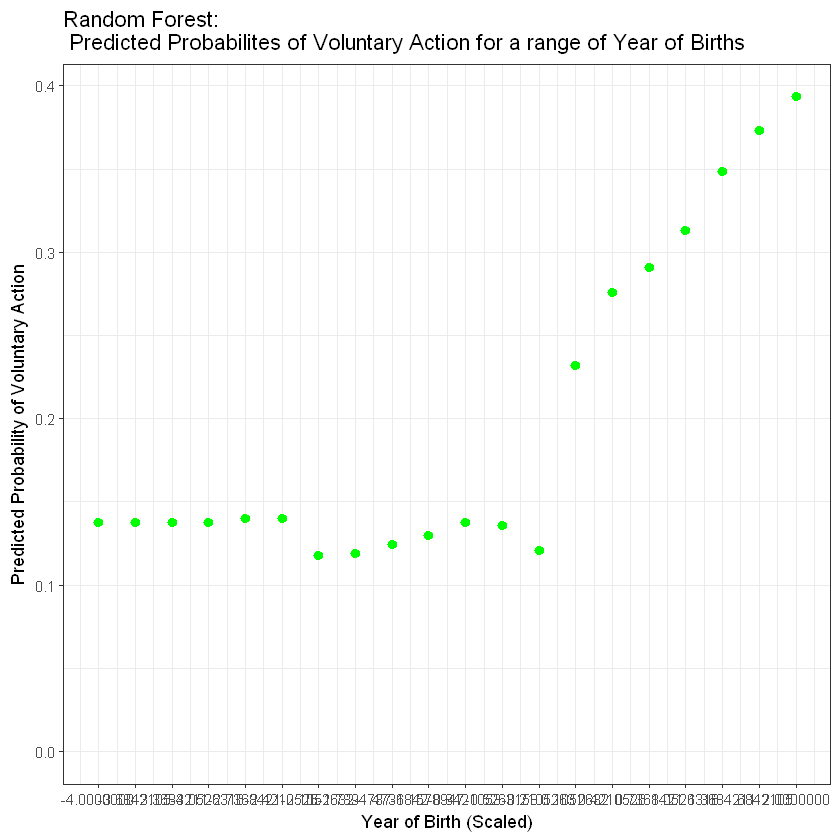

In [100]:
png("rf-age-volact.png")
myplot <- ggplot(df_rf,aes(x = df_rf[,1], y = df_rf[,2], ymin = 0, ymax = 0)) + 
    geom_pointrange(col = "green") + 
    ylab("Predicted Probability of Voluntary Action") + 
    xlab("Year of Birth (Scaled)") + 
    ggtitle("Random Forest: \n Predicted Probabilites of Voluntary Action for a range of Year of Births") + 
    scale_x_continuous(breaks = range) + 
    theme_bw() 
print(myplot)
dev.off()
print(myplot)

# SVM

## rest in server